In [ ]:
pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 11.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from faker import Faker
import random

# Initialize Faker
fake = Faker()

# Define the number of records
num_records = 500

# Generate synthetic data
data = {
    "Customer_ID": [fake.uuid4() for _ in range(num_records)],
    "Age": [random.randint(18, 70) for _ in range(num_records)],
    "Annual_Income": [round(random.uniform(20000, 150000), 2) for _ in range(num_records)],
    "Policy_Count": [random.randint(1, 10) for _ in range(num_records)],
    "Total_Premium_Paid": [round(random.uniform(1000, 50000), 2) for _ in range(num_records)],
    "Claim_Frequency": [random.randint(0, 5) for _ in range(num_records)],
    "Policy_Upgrades": [random.randint(0, 3) for _ in range(num_records)]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv("customer_segmentation_dataset.csv", index=False)

print("Dataset generated and saved as 'customer_segmentation_dataset.csv'")

Dataset generated and saved as 'customer_segmentation_dataset.csv'


In [ ]:
df=pd.read_csv("customer_segmentation_dataset.csv")
df

,Customer_ID,Age,Annual_Income,Policy_Count,Total_Premium_Paid,Claim_Frequency,Policy_Upgrades
0,c5008c3d-e399-40bc-b40a-95076591bd71,24,85064.40,8,43244.22,1,3
1,45e069fd-beb9-4761-a2b2-cc0738bbc8df,45,42857.40,1,41700.13,0,2
2,295b9453-47f0-4c5f-bded-652376c685b9,50,117373.88,7,23619.50,3,1
3,ee9ee86c-3e62-4ac7-8eb9-99147377a57d,67,139295.60,3,47242.50,5,3
4,3ede6f21-82ba-476d-aa2c-5a2cf60f7650,21,124462.53,7,11150.10,2,2
...,...,...,...,...,...,...,...
495,9c377e62-9fb9-4d8d-b4fc-94081ea33959,46,88865.64,10,10497.38,0,0
496,8d548099-0d55-4adf-b88a-51222dbf4350,55,33308.76,5,27020.72,1,1
497,8fe8abd0-9fc2-481b-ac8d-0e7077b3a155,48,35649.51,6,41078.51,5,2
498,8fb5118e-e280-432b-94b7-369fd67c3c95,45,117586.52,2,27120.78,5,3


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


In [ ]:
# Assuming df_customer is already loaded
# Selecting relevant numerical features (excluding Customer_ID)
num_cols = ['Age', 'Annual_Income', 'Policy_Count', 'Total_Premium_Paid', 'Claim_Frequency', 'Policy_Upgrades']

# Feature Scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[num_cols])  # Standardizing numerical features


In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2 (for visualization)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Convert to DataFrame
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)

# sns.scatterplot(x=df_customer['Annual_Income'], y=df_customer['Total_Premium_Paid'], hue=df_customer['KMeans_Cluster'], palette='viridis')
# plt.title("K-Means Clustering")
# plt.show()


In [ ]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)
print(df['DBSCAN_Cluster'])

0      0
1      0
2      0
3     -1
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Name: DBSCAN_Cluster, Length: 500, dtype: int64


In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
df['Hierarchical_Cluster'] = hierarchical.fit_predict(df_scaled)

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

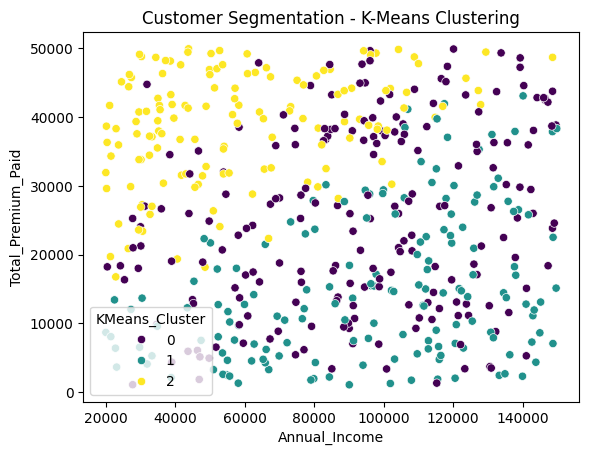

In [ ]:
# Scatter plot of K-Means clusters
import seaborn as sns  # Import the seaborn library
import matplotlib.pyplot as plt  # Import matplotlib for plotting

sns.scatterplot(x=df['Annual_Income'], y=df['Total_Premium_Paid'], hue=df['KMeans_Cluster'], palette='viridis')
plt.title("Customer Segmentation - K-Means Clustering")
plt.show()

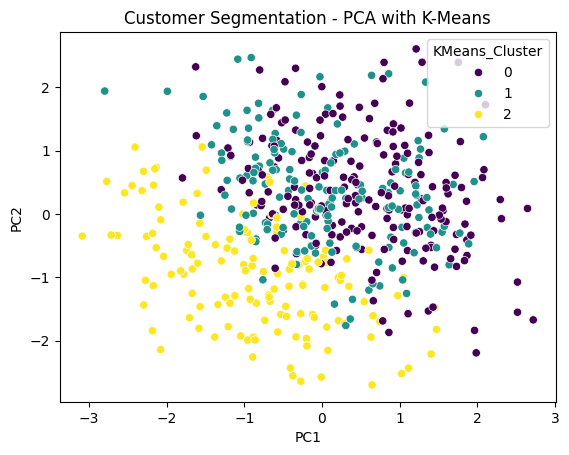

In [ ]:
# Scatter plot for PCA-reduced K-Means clusters
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df['KMeans_Cluster'], palette='viridis')
plt.title("Customer Segmentation - PCA with K-Means")
plt.show()


In [ ]:
# Compute evaluation metrics for K-Means
silhouette_kmeans = silhouette_score(df_scaled, df['KMeans_Cluster'])
davies_bouldin_kmeans = davies_bouldin_score(df_scaled, df['KMeans_Cluster'])
calinski_harabasz_kmeans = calinski_harabasz_score(df_scaled, df['KMeans_Cluster'])

# Print the results
print("✅ K-Means Clustering Performance:")
print(f"   Silhouette Score: {silhouette_kmeans:.4f} (Higher is better)")
print(f"   Davies-Bouldin Index: {davies_bouldin_kmeans:.4f} (Lower is better)")
print(f"   Calinski-Harabasz Index: {calinski_harabasz_kmeans:.4f} (Higher is better)")


✅ K-Means Clustering Performance:
   Silhouette Score: 0.1242 (Higher is better)
   Davies-Bouldin Index: 2.1969 (Lower is better)
   Calinski-Harabasz Index: 69.9500 (Higher is better)


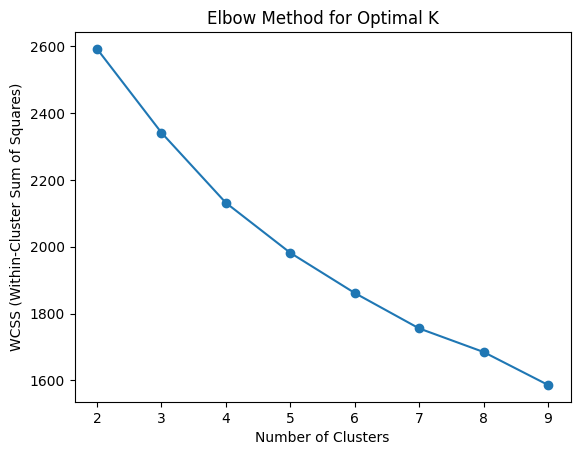

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Try different values of k (Elbow Method)
wcss = []
for i in range(2, 10):  # Checking clusters from 2 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.plot(range(2, 10), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()


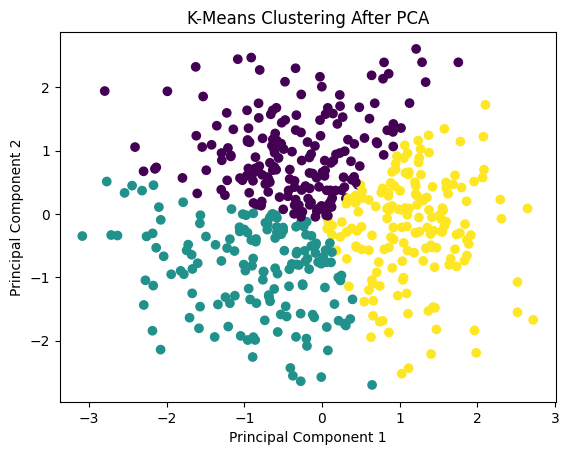

In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2 or 3 before clustering
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Apply K-Means after PCA
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df_pca)

# Scatter plot of clusters
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['KMeans_Cluster'], cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering After PCA")
plt.show()


In [ ]:
# Compute Evaluation Metrics
silhouette_kmeans = silhouette_score(df_scaled, df['KMeans_Cluster'])
davies_bouldin_kmeans = davies_bouldin_score(df_scaled, df['KMeans_Cluster'])
calinski_harabasz_kmeans = calinski_harabasz_score(df_scaled, df['KMeans_Cluster'])

# Print Results
print(f"✅ K-Means Clustering Performance:")
print(f"   Silhouette Score: {silhouette_kmeans:.4f} (Higher is better)")
print(f"   Davies-Bouldin Index: {davies_bouldin_kmeans:.4f} (Lower is better)")
print(f"   Calinski-Harabasz Index: {calinski_harabasz_kmeans:.4f} (Higher is better)")

✅ K-Means Clustering Performance:
   Silhouette Score: 0.1196 (Higher is better)
   Davies-Bouldin Index: 2.2081 (Lower is better)
   Calinski-Harabasz Index: 68.5261 (Higher is better)


In [ ]:
import pickle

# Save the KMeans model using pickle (assuming it's the best)
with open("customer_segmentation_model.pkl", "wb") as file:
    pickle.dump(kmeans, file)  # Change 'model' to 'kmeans'